In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import warnings;warnings.simplefilter('ignore')
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'

In [3]:
import numpy as np
import pandas as pd 
import tushare as ts

## 数据准备，回测准备

In [5]:
data = ts.get_k_data('hs300', '2016-01-01','2019-05-30')[['date','close']]

In [8]:
data.rename(columns = {'close':'price'}, inplace=True)

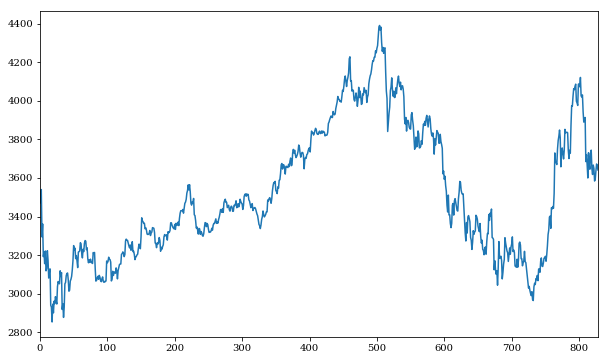

In [9]:
data['price'].plot(figsize=(10,6))

## 策略开发

In [12]:
data.set_index('date', inplace=True)

In [13]:
# 先求平均
data['return'] = np.log(data['price']/data['price'].shift(1))

In [14]:
SMA = 60

In [23]:
data['SMA'] = data['price'].rolling(SMA).mean()

In [26]:
data.tail(10)

,price,return,SMA,distance
date,,,,
2019-05-17,3648.76,-0.025756,3817.572500,-168.812500
2019-05-20,3617.79,-0.008524,3820.542167,-202.752167
2019-05-21,3666.78,0.013451,3824.123000,-157.343000
2019-05-22,3649.38,-0.004757,3827.567500,-178.187500
2019-05-23,3583.96,-0.018089,3828.631500,-244.671500
2019-05-24,3593.91,0.002772,3826.372000,-232.462000
2019-05-27,3637.20,0.011973,3825.580500,-188.380500
2019-05-28,3672.26,0.009593,3825.478333,-153.218333
2019-05-29,3663.91,-0.002276,3825.387333,-161.477333


In [17]:
threshold = 250

In [25]:
data['distance'] = data['price'] - data['SMA']

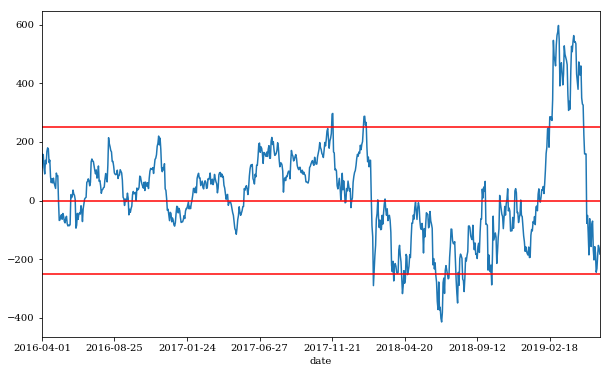

In [27]:
data['distance'].dropna().plot(figsize=(10,6))
plt.axhline(threshold, color='r')
plt.axhline(-threshold, color='r')
plt.axhline(0, color='r')

In [28]:
data['position'] = np.where(data['distance'] > threshold, -1, np.nan)    #因为0在后面是平仓的信号，这里不行用0 可以用nan来填充，后面可以drop
data['position'] = np.where(data['distance'] <-threshold, 1, data['position'])

In [30]:
data['position'] = np.where(data['distance']*data['distance'].shift(1) < 0, 0, data['position'])

In [31]:
data['position'] = data['position'].ffill().fillna(0)

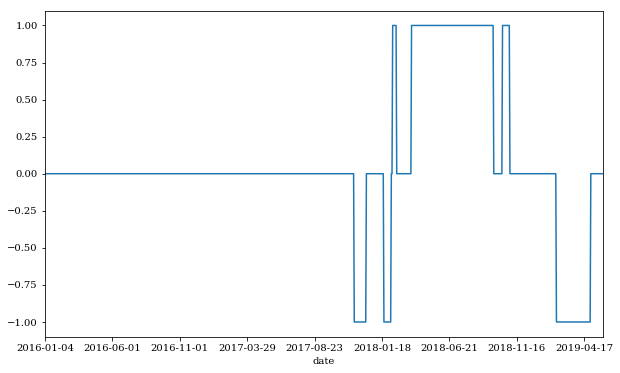

In [36]:
data['position'].plot(figsize=(10,6))

In [32]:
data['strategy'] = data['position'].shift(1)*data['return']

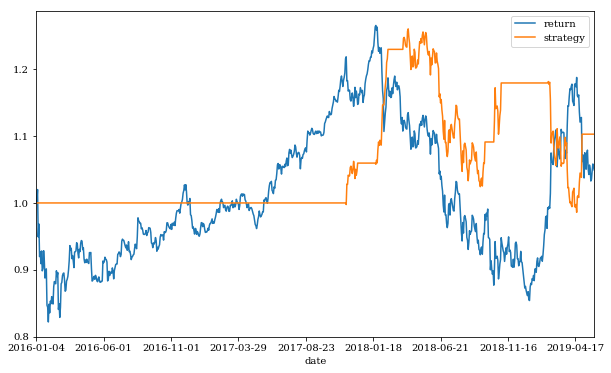

In [35]:
data[['return','strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))